In [1]:
import pandas as pd
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import math
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import pdist,squareform
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings

In [2]:
def perform_classification(model,factorsTrain, factorsTest, labelTrain, labelTest):
    model.fit(factorsTrain,labelTrain)
    accuracy=accuracy_score(labelTest,model.predict(factorsTest))
    return float("{:.2f}".format(accuracy*100))
    

<class 'pandas.core.frame.DataFrame'>
(136, 54)
<class 'pandas.core.series.Series'>
(136,)


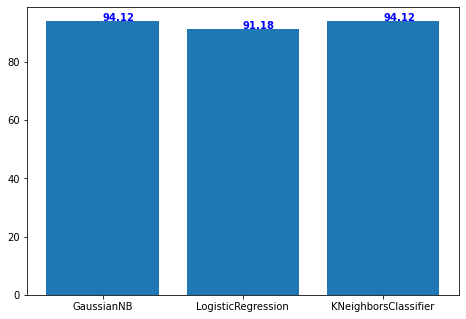

In [3]:
data = pd.read_csv('./data/marriage.csv', header=None)
accuracies=[]
models=[GaussianNB(),LogisticRegression(penalty='none'),KNeighborsClassifier()]
factorsTrain, factorsTest, labelTrain, labelTest = train_test_split(data[data.columns[:-1]], data[54], test_size=0.2, random_state=1,shuffle=True)
print(type(factorsTrain))
print(factorsTrain.shape)
print(type(labelTrain))
print(labelTrain.shape)
for model in models:
    accuracies.append(perform_classification(model,factorsTrain,factorsTest,labelTrain,labelTest))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
modelNames=[type(model).__name__ for model in models]
ax.bar(modelNames,accuracies)
for i, v in enumerate(accuracies):
    ax.text(i,v, str(v), color='blue', fontweight='bold')
plt.show()


0         1
0   -5.357120 -1.777214
1    7.342823  1.329477
2    1.351507  3.955616
3    5.439529  3.493741
4   -6.131208  1.909016
..        ...       ...
165 -8.328628 -2.876844
166 -9.111102 -5.675709
167 -8.875186  0.260375
168 -7.274430 -3.066975
169 -8.748430 -1.143669

[170 rows x 2 columns]

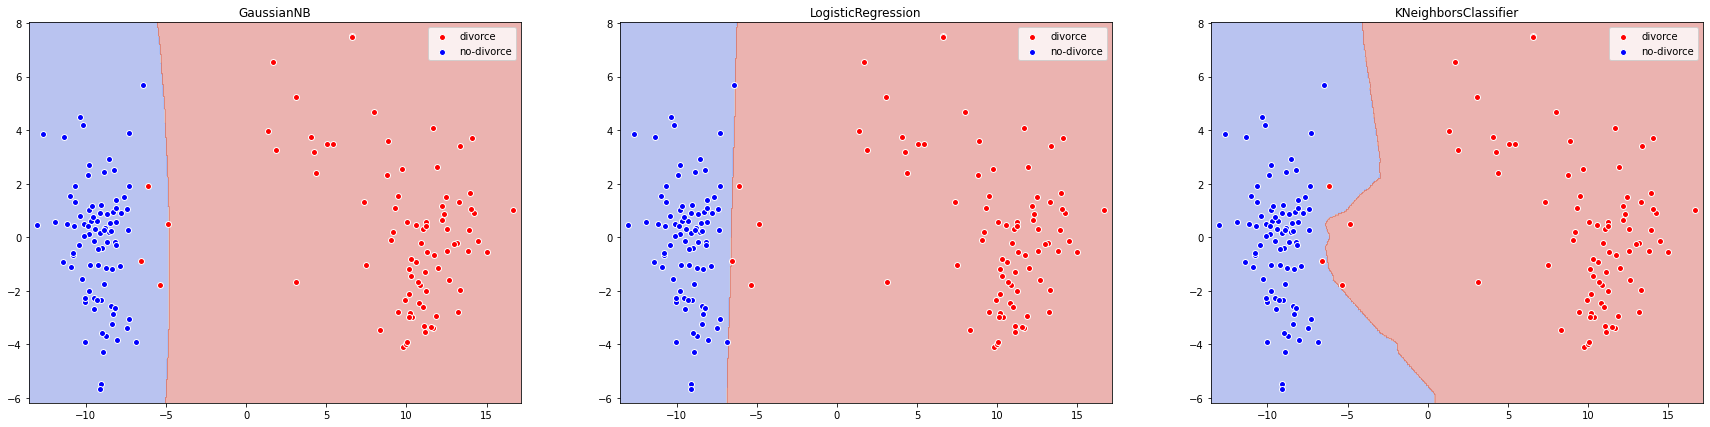

In [4]:
pca=PCA(n_components=2)
reducedData=pca.fit_transform(data[data.columns[:-1]])
reducedData= pd.DataFrame(reducedData)
display(reducedData)
labels=data[54]


nbModel=GaussianNB()
nbModel.fit(reducedData,labels)

lr_two=LogisticRegression(penalty='none')
lr_two.fit(reducedData,labels)

knn_two=KNeighborsClassifier()
knn_two.fit(reducedData,labels)


x1_min = reducedData.iloc[:,0].min()
x2_min = reducedData.iloc[:,1].min()
x1_max = reducedData.iloc[:,0].max()
x2_max = reducedData.iloc[:,1].max()

x1,x2 = np.meshgrid(np.arange(x1_min-0.5,x1_max+0.5,0.05), np.arange(x2_min-0.5,x2_max+0.5,0.05))
fig,axes = plt.subplots(1,3,figsize=(30,7))

i=0
for model in models:
    model.fit(reducedData,labels)
    grid_model= model.predict(np.array([x1.ravel(),x2.ravel()]).T)
    axes[i].contourf(x1,x2,grid_model.reshape(x2.shape),cmap='coolwarm', alpha=0.4)
    axes[i].scatter(reducedData.loc[labels==1,0],reducedData.loc[labels==1,1], c='red',edgecolors='white', label='divorce')
    axes[i].scatter(reducedData.loc[labels==0,0],reducedData.loc[labels==0,1], c='blue',edgecolors='white', label='no-divorce')
    axes[i].legend()
    axes[i].set_title(type(model).__name__)
    i+=1

In [5]:
data = scipy.io.loadmat('./data/mnist_10digits.mat')


data_train=pd.DataFrame(data=np.column_stack((data['xtrain']))).T

data_train=pd.DataFrame(preprocessing.minmax_scale(data_train))

rindex =  np.random.randint(0, len(data_train), 5000)
data_train=data_train.loc[rindex]
display(data_train.shape)

label_train=pd.DataFrame(data=np.column_stack((data['ytrain'])))
label_train=label_train.loc[rindex]


data_test=pd.DataFrame(data=np.column_stack((data['xtest']))).T
data_test=pd.DataFrame(preprocessing.minmax_scale(data_test))

label_test=pd.DataFrame(data=np.column_stack((data['ytest'])))



# This is the code to determine optimum K value for knn, since it takes a long time
# I have run it once and got the value of k
# and have commented the code to avoid running this again and again.
# I have also copied down the output I got for optimal value of k=6

# Source: https://stackoverflow.com/questions/62003285/how-can-we-find-the-optimum-k-value-in-k-nearest-neighbor
# k_range = list(range(5,50))
# weight_options = ["uniform", "distance"]

# param_grid = dict(n_neighbors = k_range, weights = weight_options)
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
# grid.fit(data_train,label_train.values.ravel())

# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)

# output of the above code:
# 0.9366000000000001
# {'n_neighbors': 6, 'weights': 'distance'}
# KNeighborsClassifier(n_neighbors=6, weights='distance')


knn_model=KNeighborsClassifier(n_neighbors=6)
knn_model.fit(data_train,label_train.values.ravel())
knn_confusion=classification_report(label_test,knn_model.predict(data_test))
print(type(knn_confusion))
print(knn_confusion)

logistic_model=LogisticRegression(penalty='none')
logistic_model.fit(data_train,label_train.values.ravel())
logistic_confusion=classification_report(label_test,logistic_model.predict(data_test))
print(logistic_confusion)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(data_train,label_train.values.ravel())
svm_model_confusion=classification_report(label_test,svm_model.predict(data_test))
print(svm_model_confusion)



(5000, 784)

<class 'str'>
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.89      1.00      0.94      1135
           2       0.98      0.89      0.93      1032
           3       0.91      0.95      0.93      1010
           4       0.94      0.93      0.93       982
           5       0.94      0.91      0.93       892
           6       0.96      0.97      0.96       958
           7       0.93      0.93      0.93      1028
           8       0.98      0.85      0.91       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       980
           1       0.96      0.95      0.96      1135
           2       0.87      0.88      0.87      1032
           3       0.85      0.84      0.85      1010
           4       0.88      0.90      0.89       982
           5       0.81      0.80      0.81       892
           6       0.92      0.91      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.80      0.81      0.80       974
           9       0.87      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.89      0.92      0.90      1032
           3       0.86 

In [6]:
# Create the SVM
# source: https://www.machinecurve.com/index.php/2020/11/25/using-radial-basis-functions-for-svms-with-python-and-scikit-learn/
samples_mean=data_train.sample(n=1000)
display(samples_mean)

#squared node-wise 2-norm distance
m=squareform(pdist(samples_mean.values, 'euclid'))

#median of squared node-wise p2 norm
med=np.median(m)
sigma=np.sqrt(med/2)

# source:https://stats.stackexchange.com/questions/317391/gamma-as-inverse-of-the-variance-of-rbf-kernel
gamma=(1/(2*(sigma**2)))
display(m)
display(med)
display(sigma)
display(gamma)


ksvm_model = svm.SVC(kernel='rbf',gamma=gamma)
ksvm_model.fit(data_train,label_train.values.ravel())
ksvm_model_confusion=classification_report(label_test,ksvm_model.predict(data_test))
print(ksvm_model_confusion)

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
4830   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
27419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3968   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
33812  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
43056  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11206  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44386  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
13744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15655  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54790  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  781  782  783  
4830   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
27419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3968   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
33812  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
43056  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
11206  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
44386  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15655  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
54790  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1000 rows x 784 columns]

array([[ 0.        , 11.38382875,  9.33028621, ...,  8.13509728,
         9.60693809, 10.06613578],
       [11.38382875,  0.        , 10.65267032, ..., 12.87283022,
        11.65850378, 10.60299407],
       [ 9.33028621, 10.65267032,  0.        , ...,  9.88858814,
         9.96761168,  9.77089339],
       ...,
       [ 8.13509728, 12.87283022,  9.88858814, ...,  0.        ,
        10.5516151 , 10.67063652],
       [ 9.60693809, 11.65850378,  9.96761168, ..., 10.5516151 ,
         0.        ,  8.11159308],
       [10.06613578, 10.60299407,  9.77089339, ..., 10.67063652,
         8.11159308,  0.        ]])

10.20260432080119

2.2586062428853317

0.09801419015742757

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       980
           1       0.99      0.97      0.98      1135
           2       0.39      0.99      0.56      1032
           3       0.92      0.84      0.88      1010
           4       0.97      0.78      0.87       982
           5       0.98      0.69      0.81       892
           6       0.99      0.75      0.85       958
           7       0.98      0.82      0.90      1028
           8       0.95      0.69      0.80       974
           9       0.96      0.80      0.87      1009

    accuracy                           0.82     10000
   macro avg       0.91      0.82      0.84     10000
weighted avg       0.91      0.82      0.84     10000



In [7]:
data = scipy.io.loadmat('./data/mnist_10digits.mat')


data_train=pd.DataFrame(data=np.column_stack((data['xtrain']))).T
label_train=pd.DataFrame(data=np.column_stack((data['ytrain'])))

data_train=pd.DataFrame(preprocessing.minmax_scale(data_train))

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(data_train, label_train)
    nn_confusion=classification_report(label_test,mlp.predict(data_test))
    print(nn_confusion)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 0.32062846
Iteration 2, loss = 0.15380246
Iteration 3, loss = 0.11584796
Iteration 4, loss = 0.09353969
Iteration 5, loss = 0.07927847
Iteration 6, loss = 0.07134286
Iteration 7, loss = 0.06220003
Iteration 8, loss = 0.05481447
Iteration 9, loss = 0.04937818
Iteration 10, loss = 0.04596632
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.97      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      